In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\Zamorano\Documents\Python\Completo.csv',encoding="utf-8")

In [3]:
df.describe()

,IDENTIFICADOR,CREDITO,DIAS_VENCIDOS,DIAS_SIN_PAGO,DIAS_SIN CONT,SALDO_VENCIDO,SALDO_TOTAL,EDAD,FRECUENCIA,INDICADOR_PAGO,Contacto,dias_first,meses_first,horas_first,dias_second,meses_second,horas_second,contactos_exitosos,intentos_totales,tasa_exito
count,21628.000000,21628.000000,21628.000000,21628.000000,21628.000000,21628.000000,21628.000000,21628.000000,0.0,21628.000000,21628.000000,21628.000000,21628.000000,21628.000000,21628.000000,21628.000000,21628.000000,21628.000000,21628.000000,21628.000000
mean,14811.701313,528835.875069,778.519512,780.037960,188.390374,40560.410593,47446.074070,45.604494,NaN,0.024552,0.289070,3.344045,5.763085,13.386952,3.362216,5.638154,13.607638,7.474662,19.386351,0.214953
std,7752.013437,78567.279639,616.875918,615.865161,154.684605,50141.126032,59115.038729,10.786277,NaN,0.154757,0.453341,1.654610,3.165479,3.501082,1.608809,3.324765,3.498029,25.995743,38.058058,0.288187
min,1.000000,365956.000000,0.000000,0.000000,0.000000,0.000000,-3198.800000,20.000000,NaN,0.000000,0.000000,1.000000,1.000000,7.000000,1.000000,1.000000,7.000000,0.000000,1.000000,0.000000
25%,8466.750000,472495.250000,270.000000,270.000000,57.000000,10606.732500,12540.885000,37.000000,NaN,0.000000,0.000000,2.000000,4.000000,11.000000,2.000000,3.000000,11.000000,0.000000,2.000000,0.000000
50%,15589.000000,530663.500000,663.000000,663.000000,167.000000,23948.965000,27717.970000,45.000000,NaN,0.000000,0.000000,3.000000,5.000000,13.000000,3.000000,5.000000,13.000000,1.000000,7.000000,0.100000
75%,21558.250000,596270.500000,1194.000000,1195.000000,304.000000,49895.895000,57733.835000,53.000000,NaN,0.000000,1.000000,5.000000,8.000000,16.000000,5.000000,8.000000,16.000000,3.000000,18.000000,0.300000
max,27062.000000,670134.000000,2650.000000,2650.000000,606.000000,536458.560000,565183.600000,84.000000,NaN,1.000000,1.000000,7.000000,12.000000,22.000000,7.000000,12.000000,22.000000,356.000000,507.000000,1.000000


In [4]:
df.head(5)

,IDENTIFICADOR,CREDITO,PRODUCTO,COLOCACION,DIAS_VENCIDOS,DIAS_SIN_PAGO,DIAS_SIN CONT,SALDO_VENCIDO,SALDO_TOTAL,IPAGO_CERO,...,hora_final,dias_first,meses_first,horas_first,dias_second,meses_second,horas_second,contactos_exitosos,intentos_totales,tasa_exito
0,1,365956,LIQUIDACION A COMPETIDORES NOMINA TRADICIONAL,TRADICIONAL,1215,1215,521,14908.60,14908.60,SI,...,NaN,6,1,14,6,1,14,0,2,0.0
1,2,365959,NOMINA TRADICIONAL,TRADICIONAL,2218,2218,64,8817.68,8817.68,SI,...,NaN,1,4,15,3,4,18,0,5,0.0
2,3,366002,NOMINA TRADICIONAL,TRADICIONAL,1783,1783,10,44000.85,44000.85,SI,...,NaN,6,6,10,6,6,10,0,1,0.0
3,5,366046,DOMICILIACION TRADICIONAL,TRADICIONAL,20,20,75,25645.72,25645.72,SI,...,NaN,4,4,19,4,4,19,0,1,0.0
4,7,366083,REFINANCIAMIENTO MEDIOS ELECTRONICOS NOMINA TR...,TRADICIONAL,2384,2384,56,45320.10,45320.10,SI,...,13:33:26,2,4,13,2,3,15,1,16,0.1


In [5]:
# Función para asignar la categoría del canal
def asignar_canal_categoria(canal):
    # Aquí puedes agregar la lógica que desees para asignar el canal
    return canal if pd.notna(canal) else 'Sin canal'

# Aplicar la función a la columna 'canal_final'
df['canal_final'] = df['canal_final'].apply(asignar_canal_categoria)
# Mostrar el DataFrame resultante
df['canal_final'].head(10)

0                  Sin canal
1                  Sin canal
2                  Sin canal
3                  Sin canal
4    (LLS) Llamada de Salida
5    (LLS) Llamada de Salida
6    (LLS) Llamada de Salida
7    (LLS) Llamada de Salida
8                  Sin canal
9                  Sin canal
Name: canal_final, dtype: object

In [6]:
# Función para agrupar las horas
def agrupar_hora(h):
    if 6 <= h <= 11:
        return 'Mañana'
    elif 11 < h <= 16:
        return 'Tarde'
    elif 16 < h <= 21:
        return 'Noche'
    else:
        return 'Madrugada'

df['horas_first'] = df['horas_first'].apply(lambda x: agrupar_hora(x) if pd.notna(x) else 'Valor no válido')
df['horas_first'].head(5)

0     Tarde
1     Tarde
2    Mañana
3     Noche
4     Tarde
Name: horas_first, dtype: object

In [7]:
# Agregar segmentación de edad en rangos
def agrupar_edad(edad):
    if 20 <= edad <= 39:
        return 'AJoven'
    elif 39 < edad <= 59:
        return 'Adulto'
    elif 59 < edad <= 79:
        return 'AMayor'
    else:
        return 'AMMayor'

df['EDAD'] = df['EDAD'].apply(agrupar_edad)
df['EDAD'].head(5)

0    AMayor
1    Adulto
2    Adulto
3    Adulto
4    AJoven
Name: EDAD, dtype: object

In [8]:
# Agregar segmentación de días en rangos
def agrupar_dia(dia):
    if 2 <= dia < 4:
        return 'Principio'
    elif 3 < dia <= 5 :
        return 'Mediados'
    elif 5 < dia <= 7:
        return 'FinD'
    else:
        return 'FinD'

df['semana'] = df['dias_first'].apply(agrupar_dia)
#df['semana'] = df['dia_first'].apply(lambda x: agrupar_dia(x) if pd.notna(x) else 'Valor no válido')
df['semana'].head(5)

0         FinD
1         FinD
2         FinD
3     Mediados
4    Principio
Name: semana, dtype: object

In [9]:
#features_cluster = ['dias_first','horas_first','canal_final','Contacto']

# Selección de columnas específicas
features_cluster = ['EDAD','SEXO','dias_first','horas_first','canal_final','semana','Contacto']
df_discretizado = df[features_cluster]
df_contacto = df_discretizado[df_discretizado['Contacto'] == 1]
df_contacto.head(5)

,EDAD,SEXO,dias_first,horas_first,canal_final,semana,Contacto
5,Adulto,FEMENINO,2,Mañana,(LLS) Llamada de Salida,Principio,1
18,Adulto,FEMENINO,2,Noche,(LLS) Llamada de Salida,Principio,1
21,Adulto,MASCULINO,4,Mañana,(LLS) Llamada de Salida,Mediados,1
22,AJoven,FEMENINO,2,Mañana,(LLS) Llamada de Salida,Principio,1
28,Adulto,MASCULINO,1,Noche,(LLS) Llamada de Salida,FinD,1


In [10]:
from kmodes.kmodes import KModes
# 4. Aplicar el algoritmo K-Modes
kmeans = KModes(n_clusters=6, init='Cao', n_init=5, verbose=1)
clusters = kmeans.fit_predict(df_contacto)

# 5. Agregar los clusters al DataFrame original para ver qué grupo pertenece cada registro
df_contacto.loc[:, 'Cluster'] = clusters

# 7. Mostrar los centroides de los clusters (los valores más representativos de cada uno)
print("Centroides de los clusters:")
centroides = kmeans.cluster_centroids_

print("Valores de los centroides:")
print(centroides)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1441, cost: 11581.0
Centroides de los clusters:
Valores de los centroides:
[['Adulto' 'MASCULINO' '2' 'Tarde' '(LLS) Llamada de Salida' 'Principio'
  '1']
 ['AJoven' 'FEMENINO' '5' 'Mañana' '(LLS) Llamada de Salida' 'Mediados'
  '1']
 ['Adulto' 'FEMENINO' '1' 'Noche' '(LLS) Llamada de Salida' 'FinD' '1']
 ['AJoven' 'MASCULINO' '6' 'Mañana' '(LLS) Llamada de Salida' 'FinD' '1']
 ['Adulto' 'FEMENINO' '1' 'Tarde' '(WTS) Whats App' 'FinD' '1']
 ['Adulto' 'FEMENINO' '3' 'Mañana' '(LLS) Llamada de Salida' 'Principio'
  '1']]


C:\Users\Zamorano\AppData\Local\Temp\ipykernel_8264\2892664675.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_contacto.loc[:, 'Cluster'] = clusters


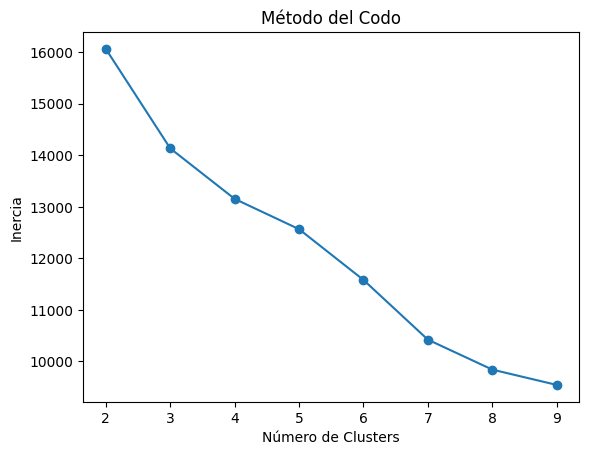

In [11]:
inertia = []
for k in range(2, 10):
    kmeans = KModes(n_clusters=k, init='Cao', n_init=5, verbose=0)
    kmeans.fit(df_contacto[features_cluster])
    inertia.append(kmeans.cost_)

plt.plot(range(2, 10), inertia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.show()

In [12]:
# Ver las categorías más frecuentes de cada cluster
for i in range(6):  # número de clusters
    print(f"Cluster {i}:")
    print(df_contacto[df_contacto['Cluster'] == i].describe(include='object'))
    print("\n")

Cluster 0:
          EDAD       SEXO horas_first              canal_final     semana
count     2351       2351        2351                     2351       2351
unique       4          2           3                        7          3
top     Adulto  MASCULINO       Tarde  (LLS) Llamada de Salida  Principio
freq      1577       1881        1536                     1770       1388


Cluster 1:
          EDAD      SEXO horas_first              canal_final    semana
count     1322      1322        1322                     1322      1322
unique       4         2           3                        7         3
top     AJoven  FEMENINO      Mañana  (LLS) Llamada de Salida  Mediados
freq       678       875         712                      937      1219


Cluster 2:
          EDAD      SEXO horas_first              canal_final semana
count      821       821         821                      821    821
unique       3         2           3                        7      2
top     Adulto  FEMENINO  

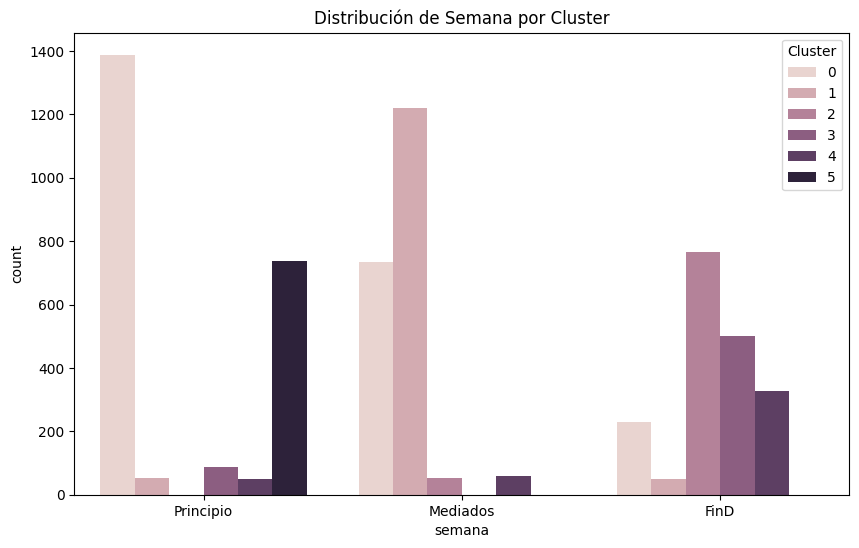

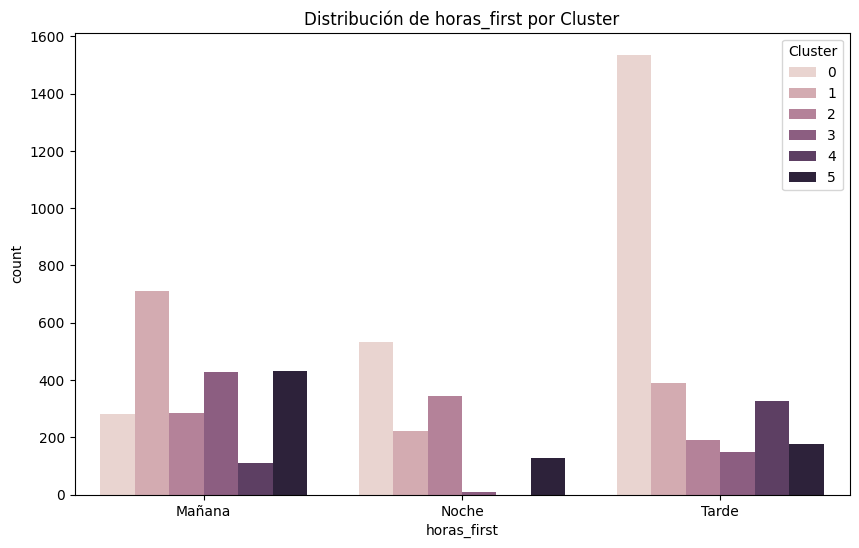

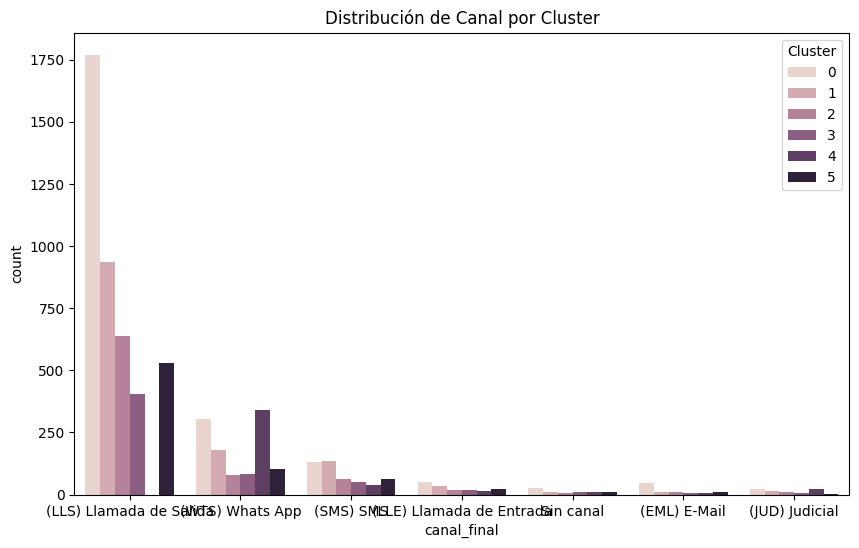

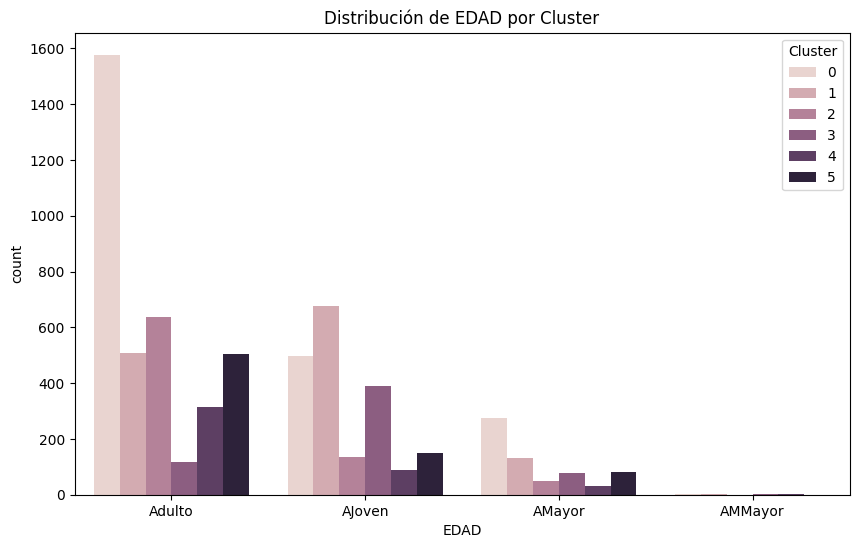

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mostrar la distribución de cada variable por cluster
plt.figure(figsize=(10, 6))
sns.countplot(x='semana', hue='Cluster', data=df_contacto)
plt.title('Distribución de Semana por Cluster')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='horas_first', hue='Cluster', data=df_contacto)
plt.title('Distribución de horas_first por Cluster')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='canal_final', hue='Cluster', data=df_contacto)
plt.title('Distribución de Canal por Cluster')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='EDAD', hue='Cluster', data=df_contacto)
plt.title('Distribución de EDAD por Cluster')
plt.show()

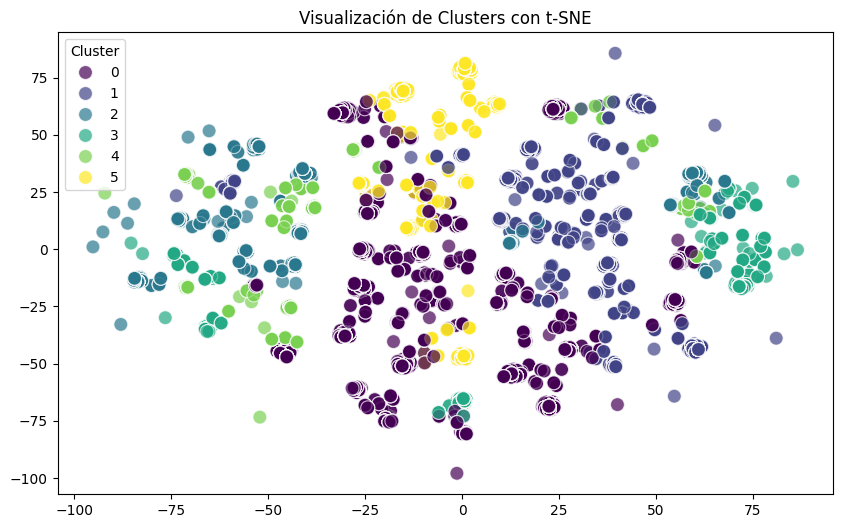

In [14]:
from sklearn.manifold import TSNE
import numpy as np

# Aplicar One-Hot Encoding a las variables categóricas para usarlas con t-SNE
df_encoded = pd.get_dummies(df_contacto[['EDAD','SEXO','dias_first', 'horas_first', 'canal_final','semana','Contacto']])

# Reducir la dimensionalidad a 2 dimensiones
tsne = TSNE(n_components=2, random_state=42)
df_tsne = tsne.fit_transform(df_encoded)

# Graficar los clusters en 2D
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_tsne[:, 0], y=df_tsne[:, 1], hue=df_contacto['Cluster'], palette='viridis', s=100, alpha=0.7)
plt.title('Visualización de Clusters con t-SNE')
plt.show()

In [19]:
# Selección de columnas específicas
#features_cluster = ['EDAD','SEXO','dias_first','horas_first','canal_final','semana','Contacto']
#df_discretizado = df[features_cluster]
#df_contacto = df_discretizado[df_discretizado['Contacto'] == 1]
# Agrupación de gestiones por cliente
edades = df_contacto['EDAD'].value_counts()
# Estadística de gestiones por cliente 
print(edades)

EDAD
Adulto     3656
AJoven     1937
AMayor      650
AMMayor       9
Name: count, dtype: int64


In [20]:
genero = df_contacto['SEXO'].value_counts()
# Estadística de gestiones por cliente 
print(genero)

SEXO
MASCULINO    3286
FEMENINO     2966
Name: count, dtype: int64


In [21]:
semanas = df_contacto['semana'].value_counts()
# Estadística de gestiones por cliente 
print(semanas)

semana
Principio    2312
Mediados     2067
FinD         1873
Name: count, dtype: int64


In [22]:
horas = df_contacto['horas_first'].value_counts()
# Estadística de gestiones por cliente 
print(horas)

horas_first
Tarde     2767
Mañana    2252
Noche     1233
Name: count, dtype: int64


In [23]:
canales = df_contacto['canal_final'].value_counts()
# Estadística de gestiones por cliente 
print(canales)

canal_final
(LLS) Llamada de Salida     4278
(WTS) Whats App             1086
(SMS) SMS                    479
(LLE) Llamada de Entrada     159
(EML) E-Mail                  92
(JUD) Judicial                80
Sin canal                     78
Name: count, dtype: int64


In [29]:
# Contar por grupo de hora, día y canal
grouped = df_contacto.groupby(['EDAD', 'SEXO','semana','horas_first', 'canal_final']).nunique().reset_index()
grouped.head(10)

,EDAD,SEXO,semana,horas_first,canal_final,dias_first,Contacto,Cluster
0,AJoven,FEMENINO,FinD,Mañana,(EML) E-Mail,1,1,1
1,AJoven,FEMENINO,FinD,Mañana,(JUD) Judicial,1,1,1
2,AJoven,FEMENINO,FinD,Mañana,(LLE) Llamada de Entrada,2,1,2
3,AJoven,FEMENINO,FinD,Mañana,(LLS) Llamada de Salida,2,1,2
4,AJoven,FEMENINO,FinD,Mañana,(SMS) SMS,2,1,2
5,AJoven,FEMENINO,FinD,Mañana,(WTS) Whats App,2,1,2
6,AJoven,FEMENINO,FinD,Noche,(EML) E-Mail,1,1,1
7,AJoven,FEMENINO,FinD,Noche,(JUD) Judicial,1,1,1
8,AJoven,FEMENINO,FinD,Noche,(LLE) Llamada de Entrada,1,1,1
9,AJoven,FEMENINO,FinD,Noche,(LLS) Llamada de Salida,2,1,1


In [30]:
# Agrupar por hora, dia y canal, y contar el número total de registros en cada grupo
grouped_total = df_contacto.groupby(['EDAD', 'SEXO','semana','horas_first', 'canal_final']).size().reset_index()
grouped_total.head(10)

,EDAD,SEXO,semana,horas_first,canal_final,0
0,AJoven,FEMENINO,FinD,Mañana,(EML) E-Mail,2
1,AJoven,FEMENINO,FinD,Mañana,(JUD) Judicial,2
2,AJoven,FEMENINO,FinD,Mañana,(LLE) Llamada de Entrada,2
3,AJoven,FEMENINO,FinD,Mañana,(LLS) Llamada de Salida,66
4,AJoven,FEMENINO,FinD,Mañana,(SMS) SMS,15
5,AJoven,FEMENINO,FinD,Mañana,(WTS) Whats App,29
6,AJoven,FEMENINO,FinD,Noche,(EML) E-Mail,1
7,AJoven,FEMENINO,FinD,Noche,(JUD) Judicial,2
8,AJoven,FEMENINO,FinD,Noche,(LLE) Llamada de Entrada,1
9,AJoven,FEMENINO,FinD,Noche,(LLS) Llamada de Salida,28


with pd.ExcelWriter('resultados_clusters_kmodes.xlsx', engine='openpyxl') as writer:
   grouped_total.to_excel(writer, sheet_name="Agrupaciones", index=False)